In [61]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import numpy as np

# Key Libraries Part 2

## Pandas

Pandas is an all-purpose data analysis library for Python. Its main strengths are handling numerical tables and timeseries. Much like many other scientific Python libraries it builds on `numpy`. 

They key classes in Pandas are the `Series` for representing a single timeseries and the `DataFrame`. `DataFrame` should feel very similar to the R data frame.

There is a good quick-start guide here: https://pandas.pydata.org/pandas-docs/stable/10min.html

A more extensive tutorial exists here: https://pandas.pydata.org/pandas-docs/stable/tutorials.html

To begin with we can create some random data:

In [8]:
# 1000 random numbers
random_data = np.random.randn(1000)

Then we can create a date index:

In [9]:
# Starting at 1st Jan 2000, create a date range of 1000 days
dates = pd.date_range('1/1/2000', periods=1000)

### Series

Now we can make a series out of the index and data:

In [11]:
s = pd.Series(random_data, index=dates)

We can then plot the data like this:

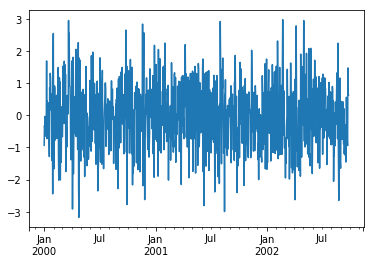

In [13]:
s.plot()

Both `DataFrame`s and `Series` have methods for transforming the data they hold. For example:

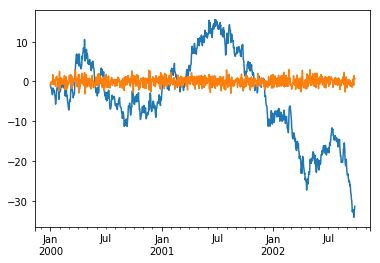

In [17]:
# Get the cumulative sum
cs = s.cumsum()

# Plot both the cumulative sum and the original data
cs.plot()
s.plot()

### DataFrame

`DataFrames` are a way to hold multiple series against the same index (like a spreadsheet).

They have very similar methods to Series.

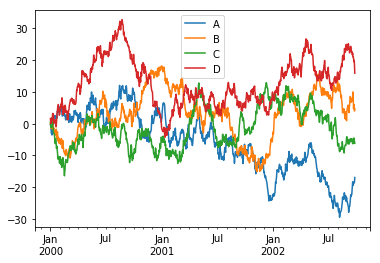

In [23]:
# Create a 1000 x 4 matrix of data
d = np.random.randn(1000, 4)

# Create a dataframe with our original date index
df = pd.DataFrame(d, index=dates, columns=['A', 'B', 'C', 'D'])

# Calculate the cumulative sum
df_sum = df.cumsum()

# Plot
df_sum.plot()
plt.legend(loc='best')

We can access individual columns too, for example:

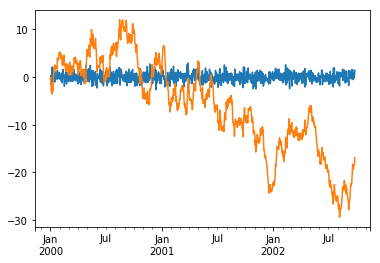

In [25]:
df['A'].plot()
df_sum['A'].plot()

### CSV files

Pandas is excellent at handling CSV files and very tolerant of formatting. We can load CSV files straight from URLs or from our own hard drives with the `read_csv` method. 

Taking the R datasets from https://vincentarelbundock.github.io/Rdatasets/datasets.html we can demonstrate this. For example, with the US judges ratings dataset:

In [71]:
data = pd.read_csv(
    'https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv',
    index_col=0
)

We can print the data like this:

In [72]:
data

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6
"CALLAHAN,R.J.",10.6,9.0,8.9,8.7,8.5,8.5,8.5,8.5,8.6,8.4,9.1,9.0
"COHEN,S.S.",7.0,5.9,4.9,5.1,5.4,5.9,4.8,5.1,4.7,4.9,6.8,5.0
"DALY,J.J.",7.3,8.9,8.9,8.7,8.6,8.5,8.4,8.4,8.4,8.5,8.8,8.8
"DANNEHY,J.F.",8.2,7.9,6.7,8.1,7.9,8.0,7.9,8.1,7.7,7.8,8.5,7.9


And as before we can plot it like this:

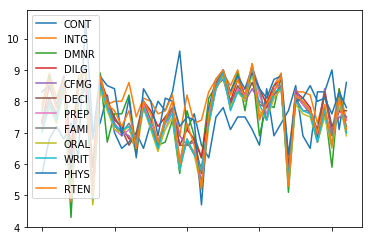

In [48]:
data.plot()

## Exercise - Moving Averages

First of all, read the following dataset of Australian weather using `pd.read_csv`: https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/bomregions.csv. 

Remember to specify the 2nd index using `index_col=1` (remember the index starts from zero).

Plot the `southRain` column (remember you can access this by using square brackets and the column name, e.g. `df['southRain']` if your data is in a variable called `df`.

Plot the 10 day exponentially weighted moving average. Note that this can be done using the function, `pd.ewma` function, for example:

`ten_day = pd.ewma(df['southRain'], halflife=10)`

In [87]:
# Put your code here

## Exercise - Correlation

Using the same dataset of Australian weather, calculate the correlation between rain in the different regions.

First of all, we need to define a list of the variables we want to access. This looks like:

```
names = ['eastRain', 'seRain', 'southRain', 'swRain', 'westRain', 'northRain']
```

We can then filter our original dataset to just these names with:

```
rain_data = df[names]
```

We can then call `rain_data.corr()` to get the data.

Now try to get the correlation matrix between temperatures in the regions.

In [135]:
names = ['eastRain', 'seRain', 'southRain', 'swRain', 'westRain', 'northRain']
rain_data = df[names]

rain_data.corr()

,eastRain,seRain,southRain,swRain,westRain,northRain
eastRain,1.000000,0.667083,0.800909,0.174917,0.230342,0.739749
seRain,0.667083,1.000000,0.835521,0.404880,0.179563,0.300656
southRain,0.800909,0.835521,1.000000,0.430972,0.539845,0.623605
swRain,0.174917,0.404880,0.430972,1.000000,0.290187,0.048495
westRain,0.230342,0.179563,0.539845,0.290187,1.000000,0.651275
northRain,0.739749,0.300656,0.623605,0.048495,0.651275,1.000000
